In [ ]:
import numpy as np
import cv2
import os
from PIL import Image
import tensorflow as tf

In [ ]:
pasta = '/content/drive/MyDrive/ELT579/Problema4/imagens_celulas_1000/'


positivas = os.listdir(pasta + 'positivos/')

negativas = os.listdir(pasta + 'negativos/')


In [ ]:
dataset = list()

label = list()

SIZE = 64

for i, image_name in enumerate(positivas):
  if (image_name.split('.')[1] == 'png'):
    image = cv2.imread(pasta + 'positivos/' + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(1)

for i, image_name in enumerate(negativas):
  if (image_name.split('.')[1] == 'png'):
    image = cv2.imread(pasta + 'negativos/' + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE,SIZE))
    dataset.append(np.array(image))
    label.append(0)


label =  0
imagem


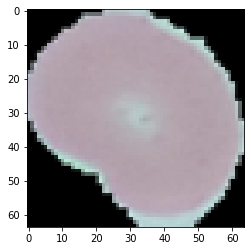

In [ ]:
import matplotlib.pyplot as plt

print('label = ', label[-2])

print('imagem')
plt.imshow(dataset[-2])

In [ ]:
X = np.array(dataset)

X = X/255.0

y = tf.keras.utils.to_categorical(np.array(label))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)



In [ ]:
print(np.shape(X_train))

print(np.shape(y_train))

(1600, 64, 64, 3)
(1600, 2)


In [ ]:
TAM = (SIZE, SIZE, 3)

inp = tf.keras.Input(shape = TAM)

conv1 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(inp)
pool1 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv1)
drop1 = tf.keras.layers.Dropout(rate = 0.2)(pool1)

conv2 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(drop1)
pool2 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv2)
drop2 = tf.keras.layers.Dropout(rate = 0.2)(pool2)

conv3 = tf.keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same')(drop2)
pool3 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv3)
drop3 = tf.keras.layers.Dropout(rate = 0.2)(pool3)

flat = tf.keras.layers.Flatten()(drop3)

dense1 = tf.keras.layers.Dense(512, activation = 'relu')(flat)
drop4  = tf.keras.layers.Dropout(rate = 0.2)(dense1)

dense2 = tf.keras.layers.Dense(256, activation = 'relu')(drop4)
drop5  = tf.keras.layers.Dropout(rate = 0.2)(dense2)

out = tf.keras.layers.Dense(2, activation= 'sigmoid')(drop5)

model = tf.keras.Model(inputs = inp, outputs = out)

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.summary()



Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_17 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                      

In [ ]:
history = model.fit(X_train, y_train, batch_size = 64, verbose = 1, epochs = 40, validation_split = 0.1 )

Epoch 1/40
23/23 [==============================] - 2s 35ms/step - loss: 0.6986 - accuracy: 0.5333 - val_loss: 0.6785 - val_accuracy: 0.7188
Epoch 2/40
23/23 [==============================] - 0s 21ms/step - loss: 0.6603 - accuracy: 0.6104 - val_loss: 0.6725 - val_accuracy: 0.5750
Epoch 3/40
23/23 [==============================] - 1s 23ms/step - loss: 0.6078 - accuracy: 0.6569 - val_loss: 0.6540 - val_accuracy: 0.5938
Epoch 4/40
23/23 [==============================] - 1s 23ms/step - loss: 0.5880 - accuracy: 0.6736 - val_loss: 0.5686 - val_accuracy: 0.7500
Epoch 5/40
23/23 [==============================] - 0s 20ms/step - loss: 0.5585 - accuracy: 0.6944 - val_loss: 0.5206 - val_accuracy: 0.7625
Epoch 6/40
23/23 [==============================] - 0s 21ms/step - loss: 0.5887 - accuracy: 0.6674 - val_loss: 0.5618 - val_accuracy: 0.7750
Epoch 7/40
23/23 [==============================] - 1s 23ms/step - loss: 0.5538 - accuracy: 0.7049 - val_loss: 0.5492 - val_accuracy: 0.7437
Epoch 8/40
23

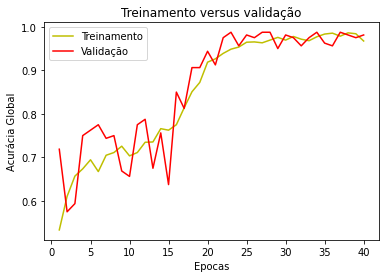

In [ ]:
#plotar gráficos
import matplotlib.pyplot as plt

loss = history.history['accuracy']
val_loss = history.history['val_accuracy']

epochs = range(1, len(loss)+ 1)

plt.plot(epochs, loss, 'y', label = "Treinamento")
plt.plot(epochs, val_loss, 'r', label = "Validação")

plt.title("Treinamento versus validação")
plt.xlabel("Epocas")
plt.ylabel("Acurácia Global")
plt.legend()
plt.show()

In [ ]:
model.save('malaria_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('malaria_model.h5')

In [ ]:
_,score = model.evaluate(X_test, y_test)

print(score)

13/13 [==============================] - 0s 12ms/step - loss: 0.1290 - accuracy: 0.9600
0.9599999785423279
